In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,NaN,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,NaN
2,-0.169460,0.50153,2.470900,NaN,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,NaN,2.89330,1.53750,0.99942,3.65930,NaN,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,NaN,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	105
float64		column 2	65
float64		column 3	52
float64		column 4	91
float64		column 5	52
float64		column 6	92
float64		column 7	79
float64		column 8	131
float64		column 9	65
float64		column 10	66
float64		column 11	65
float64		column 12	79


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,695.000000,735.000000,748.000000,709.000000,748.000000,708.000000,721.000000,669.000000,735.000000,734.000000,735.000000,721.000000
mean,1.445145,1.336901,1.979132,1.946897,1.953493,2.027039,1.947656,2.014132,1.991663,1.982071,1.977689,1.964139
std,2.678387,3.551693,1.130075,1.119001,1.150463,1.108885,1.136483,1.068532,1.113377,1.133946,1.149335,1.098597
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009630,0.002484,0.002000,0.000288
25%,-0.365715,-0.550785,1.030775,1.002100,0.959820,1.121300,0.962440,1.094700,1.093950,1.057875,1.011700,1.034300
50%,0.523590,1.772900,1.967400,1.926800,1.987200,2.018000,1.944800,2.027700,1.985800,1.996300,1.990900,1.956600
75%,3.862050,4.469300,2.886000,2.899000,2.846750,2.950750,2.913100,2.838500,2.942800,2.954850,2.962500,2.824500
max,6.982200,7.691000,3.992600,3.992000,3.998500,3.997500,3.999900,3.993000,3.996200,3.998800,3.990900,3.997000


<AxesSubplot:>

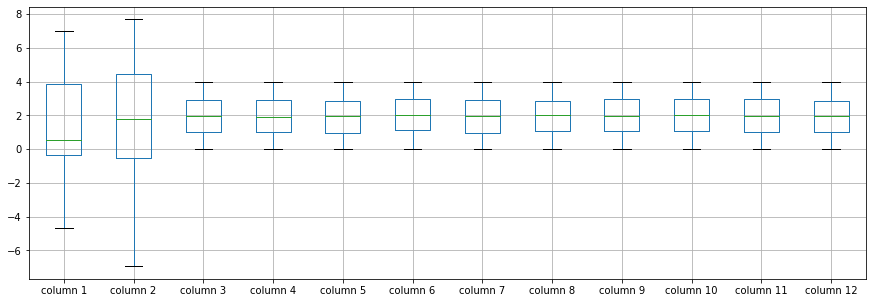

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.445145
column 2     1.336901
column 3     1.979132
column 4     1.946897
column 5     1.953493
column 6     2.027039
column 7     1.947656
column 8     2.014132
column 9     1.991663
column 10    1.982071
column 11    1.977689
column 12    1.964139
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.406941,0.017150,0.023302,0.013929,0.021248,0.027553,0.007754,-0.023218,0.010340,0.030335,0.013807
column 2,-0.406941,1.000000,-0.019418,-0.039538,-0.017561,-0.015173,0.016914,-0.009706,0.036125,-0.033703,-0.090191,0.028592
column 3,0.017150,-0.019418,1.000000,-0.028570,0.075035,-0.029600,0.036234,-0.022903,0.028887,-0.000525,-0.021462,-0.009458
column 4,0.023302,-0.039538,-0.028570,1.000000,0.031632,-0.043333,0.010757,0.031966,-0.043443,0.051265,-0.001416,-0.042567
column 5,0.013929,-0.017561,0.075035,0.031632,1.000000,0.059139,0.004136,0.032843,0.010549,0.011228,0.009523,-0.007737
column 6,0.021248,-0.015173,-0.029600,-0.043333,0.059139,1.000000,-0.099455,0.050871,-0.004194,0.019527,-0.048642,-0.005850
column 7,0.027553,0.016914,0.036234,0.010757,0.004136,-0.099455,1.000000,-0.058982,-0.009166,-0.053851,-0.048613,0.051632
column 8,0.007754,-0.009706,-0.022903,0.031966,0.032843,0.050871,-0.058982,1.000000,-0.078155,-0.051855,0.005248,-0.046628
column 9,-0.023218,0.036125,0.028887,-0.043443,0.010549,-0.004194,-0.009166,-0.078155,1.000000,0.024778,0.015551,-0.013709
column 10,0.010340,-0.033703,-0.000525,0.051265,0.011228,0.019527,-0.053851,-0.051855,0.024778,1.000000,-0.070783,0.028030


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+49,12+49+49,12+49+49+49,12+49+49+49+49,12+49+49+49+49+49,12+49+49+49+49,12+49+49+49,12+49+49,12+49,12], vae_layer = False, seed = 40)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.414368476867676
Epoch: 1 , loss: 26.20842041015625
Epoch: 2 , loss: 25.0159712600708
Epoch: 3 , loss: 23.43801456451416
Epoch: 4 , loss: 22.666445503234865
Epoch: 5 , loss: 22.07413631439209
Epoch: 6 , loss: 21.600777359008788
Epoch: 7 , loss: 20.93453884124756
Epoch: 8 , loss: 20.44771553039551
Epoch: 9 , loss: 20.05536434173584
Epoch: 10 , loss: 19.679315338134767
Epoch: 11 , loss: 19.49748363494873
Epoch: 12 , loss: 19.197770805358886
Epoch: 13 , loss: 18.72485782623291
Epoch: 14 , loss: 18.68660545349121
Epoch: 15 , loss: 18.493920135498048
Epoch: 16 , loss: 18.27121536254883
Epoch: 17 , loss: 18.321273918151856
Epoch: 18 , loss: 18.170789108276367
Epoch: 19 , loss: 17.94582950592041
Epoch: 20 , loss: 17.98078567504883
Epoch: 21 , loss: 17.936761455535887
Epoch: 22 , loss: 17.85913661956787
Epoch: 23 , loss: 17.631156044006346
Epoch: 24 , loss: 17.810523014068604
Epoch: 25 , loss: 17.51895610809

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     2.207787
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,-0.918099,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.867248
2,0.0,0.0,0.0,-1.840208,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.0,-0.925633,0.000000,0.0,0.000000,0.0,1.033342,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,-2.542873,0.0,0.000000,0.000000
796,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
797,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
798,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-0.137874


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(66.51703615493952, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.26797396663012857

In [18]:
new_df.iloc[66,:]

column 1     0.207620
column 2    -0.550520
column 3     2.339900
column 4     1.700091
column 5     1.401300
column 6     2.765800
column 7     1.304100
column 8     1.249300
column 9     1.059400
column 10    1.284300
column 11    1.879400
column 12    1.744223
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,2.615601,0.469590,0.679080,3.434400,2.79240,2.776300,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.921600,0.424720,1.178500,1.680200,1.38880,3.216700,2.92360,0.772910,1.508698
2,-0.169460,0.50153,2.470900,1.224792,1.567600,1.482400,0.921600,2.64240,1.518700,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.956300,2.787000,1.670067,2.893300,1.53750,0.999420,3.65930,1.651592,3.265800
4,0.098830,0.23418,0.429700,1.631200,3.554100,2.271100,0.374250,2.17860,1.314000,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.556120,0.070769,2.074700,0.803040,3.22290,0.950427,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.346100,1.377300,2.288700,0.396130,2.39610,2.463500,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.264600,3.341200,1.537000,1.225600,0.74027,2.495400,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.844000,1.098700,3.424300,0.810810,3.72700,1.187900,0.95112,1.884500,1.005826


In [20]:
imputations[-1].to_excel("4-gauss_NL_10(imp).xlsx", index=False, header=False)